In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [14]:
#Read each dataset 
data_0 = pd.read_csv("/content/0-resting.csv",sep = ';')
data_1 = pd.read_csv("/content/1-walking.csv",sep = ';')
data_2 = pd.read_csv("/content/2-steps.csv",sep = ';')
data_3 = pd.read_csv("/content/3-plank.csv",sep = ';')
data_4 = pd.read_csv("/content/4-mountainClimbing.csv",sep = ';')
data_5 = pd.read_csv("/content/5-squats.csv",sep = ';')

print("Resting datapoints: ", len(data_0. index))
print("Walking datapoints: ", len(data_1. index))
print("Steps datapoints: ", len(data_2. index))
print("Plank datapoints: ", len(data_3. index))
print("MC datapoints: ", len(data_4. index))
print("Squats datapoints: ", len(data_5. index))

Resting datapoints:  47518
Walking datapoints:  11669
Steps datapoints:  17903
Plank datapoints:  15300
MC datapoints:  9811
Squats datapoints:  12098


In [15]:
def sub_plots(data_0, data_1, data_2, data_3, data_4, data_5):

  fig, axes = plt.subplots(nrows=2, ncols=3)

  data_0.plot(x ='SPO', y='heart_rate', kind = 'scatter', ax=axes[0,0],  title='Resting', figsize=(15,10))
  data_1.plot(x ='SPO', y='heart_rate', kind = 'scatter', ax=axes[0,1], title='Walking')
  data_2.plot(x ='SPO', y='heart_rate', kind = 'scatter', ax=axes[0,2], title='Steps')
  data_3.plot(x ='SPO', y='heart_rate', kind = 'scatter', ax=axes[1,0], title='Plank')
  data_4.plot(x ='SPO', y='heart_rate', kind = 'scatter', ax=axes[1,1],  title='MC')
  data_5.plot(x ='SPO', y='heart_rate', kind = 'scatter', ax=axes[1,2], title='Squats')
  plt.show()

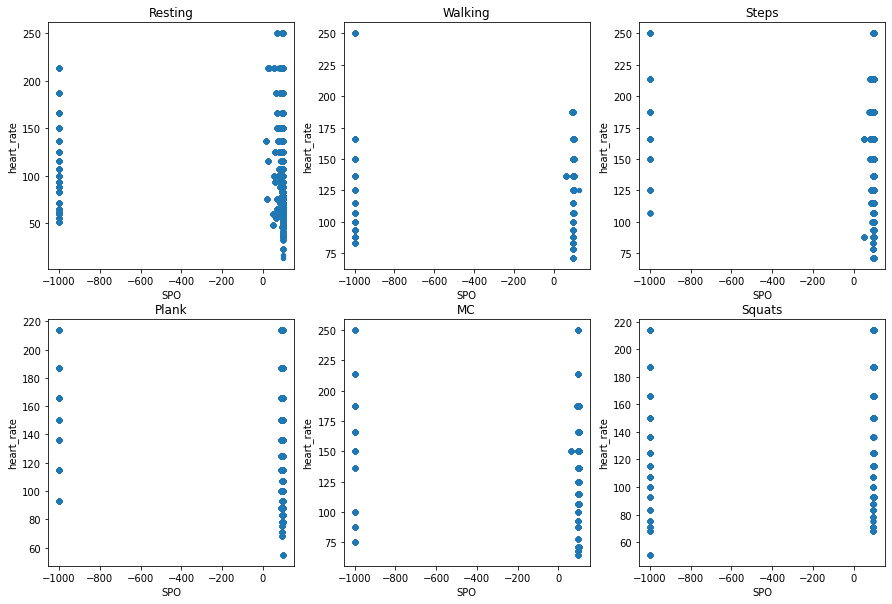

In [16]:
# Raw data
sub_plots(data_0, data_1, data_2, data_3, data_4, data_5)

In [17]:
data_0_new= data_0.copy()
data_1_new= data_1.copy()
data_2_new= data_2.copy()
data_3_new= data_3.copy()
data_4_new= data_4.copy()
data_5_new= data_5.copy()

# Calculate mean of SPO without negative values
# Replacce replace negative values with mean 
data_0_new.loc[data_0_new['SPO'] < 0, 'SPO'] = data_0.loc[data_0['SPO'] > 0, 'SPO'].mean()
data_1_new.loc[data_1_new['SPO'] < 0, 'SPO'] = data_1.loc[data_1['SPO'] > 0, 'SPO'].mean()
data_2_new.loc[data_2_new['SPO'] < 0, 'SPO'] = data_2.loc[data_2['SPO'] > 0, 'SPO'].mean()
data_3_new.loc[data_3_new['SPO'] < 0, 'SPO'] = data_3.loc[data_3['SPO'] > 0, 'SPO'].mean()
data_4_new.loc[data_4_new['SPO'] < 0, 'SPO'] = data_4.loc[data_4['SPO'] > 0, 'SPO'].mean()
data_5_new.loc[data_5_new['SPO'] < 0, 'SPO'] = data_5.loc[data_5['SPO'] > 0, 'SPO'].mean()

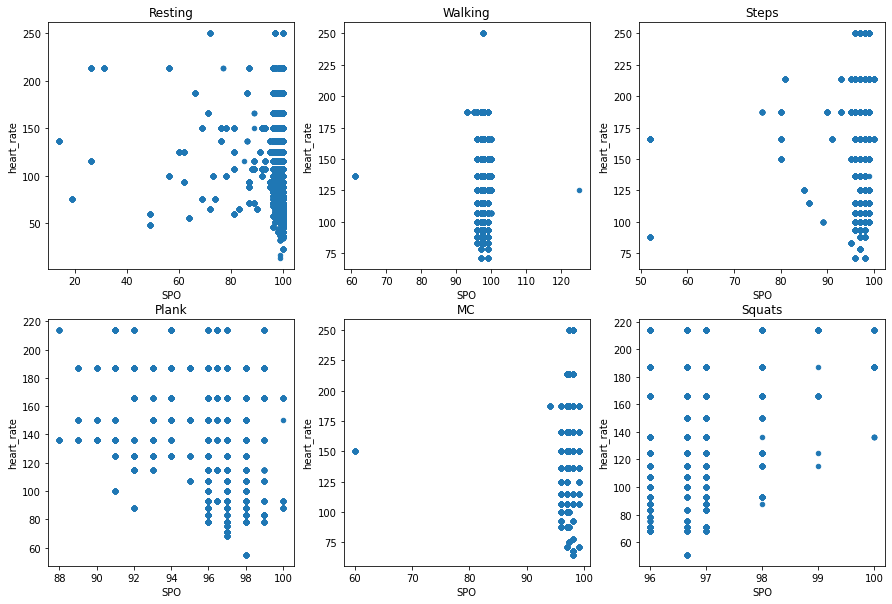

In [18]:
# Afeter removing negative values
sub_plots(data_0_new, data_1_new, data_2_new, data_3_new, data_4_new, data_5_new)

In [19]:
# Reduce dataset taking mean each X rows, getting n datapoints per exercise

n=2500
data_0_red = data_0_new.copy()
data_1_red = data_1_new.copy()
data_2_red = data_2_new.copy()
data_3_red = data_3_new.copy()
data_4_red = data_4_new.copy()
data_5_red = data_5_new.copy()

data_0_red = data_0_red.groupby(np.arange(len(data_0_red))// (len(data_0_red)/n)).mean()
data_1_red = data_1_red.groupby(np.arange(len(data_1_red))// (len(data_1_red)/n) ).mean()
data_2_red = data_2_red.groupby(np.arange(len(data_2_red))// (len(data_2_red)/n) ).mean()
data_3_red = data_3_red.groupby(np.arange(len(data_3_red))// (len(data_3_red)/n) ).mean()
data_4_red = data_4_red.groupby(np.arange(len(data_4_red))// (len(data_4_red)/n) ).mean()
data_5_red = data_5_red.groupby(np.arange(len(data_5_red))// (len(data_5_red)/n) ).mean()

data_0_red[['person_id', 'exercise']] = data_0_red[['person_id', 'exercise']].astype(int)
data_1_red[['person_id', 'exercise']] = data_1_red[['person_id', 'exercise']].astype(int)
data_2_red[['person_id', 'exercise']] = data_2_red[['person_id', 'exercise']].astype(int)
data_3_red[['person_id', 'exercise']] = data_3_red[['person_id', 'exercise']].astype(int)
data_4_red[['person_id', 'exercise']] = data_4_red[['person_id', 'exercise']].astype(int)
data_5_red[['person_id', 'exercise']] = data_5_red[['person_id', 'exercise']].astype(int)

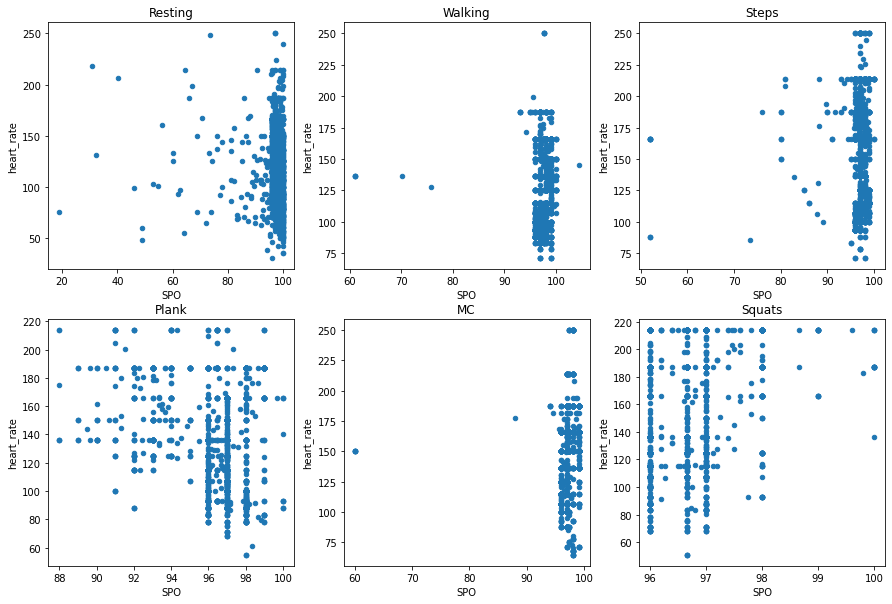

In [20]:
# Afeter reducing dataset
sub_plots(data_0_red, data_1_red, data_2_red, data_3_red, data_4_red, data_5_red)

In [21]:
def create_em_data(data, ex):
  baseline = pd.read_csv("/content/baselines_pulseoxi.csv",sep = ';')
  lv_spo=[]
  lv_hr=[]

  for per in range(1, 6):
    means = baseline.loc[(baseline['person_id'] == per) & (baseline['exercise'] == ex)]
    dom = data.loc[(data['person_id'] == per)]

    l_means= len(means)
    ld = len(dom)      

    if ld != 0 and l_means !=0:
      em_spo = np.random.normal(means['spo_base'],dom.std()[4],ld)
      em_hr = np.random.normal(means['heart_rate_base'],dom.std()[5],ld)
      
      #append everything    
      lv_spo = np.append(lv_spo,em_spo)
      lv_hr = np.append(lv_hr,em_hr)

  #add column to data 
  data['spo_base'] = lv_spo
  data['heart_rate_base'] = lv_hr
  return data

In [22]:
# Create emulated data (SPO, HR) given meand from base values (Pulse Oximeter) and SD from data colected (Sensor)
data_0_red= create_em_data(data_0_red,0)
data_1_red= create_em_data(data_1_red,1)
data_2_red= create_em_data(data_2_red,2)
data_3_red= create_em_data(data_3_red,3)
data_4_red= create_em_data(data_4_red,4)
data_5_red= create_em_data(data_5_red,5)

In [23]:
# Read accelerometer data of each exercise
pos_0 = pd.read_csv("/content/0-accel.csv",sep = ';')
pos_1 = pd.read_csv("/content/1-accel.csv",sep = ';')
pos_2 = pd.read_csv("/content/2-accel.csv",sep = ';')
pos_3 = pd.read_csv("/content/3-accel.csv",sep = ';')
pos_4 = pd.read_csv("/content/4-accel.csv",sep = ';')
pos_5 = pd.read_csv("/content/5-accel.csv",sep = ';')

pos_0 = pos_0.drop(columns=['person_id', 'exercise'])
pos_1 = pos_1.drop(columns=['person_id', 'exercise'])
pos_2 = pos_2.drop(columns=['person_id', 'exercise'])
pos_3 = pos_3.drop(columns=['person_id', 'exercise'])
pos_4 = pos_4.drop(columns=['person_id', 'exercise'])
pos_5 = pos_5.drop(columns=['person_id', 'exercise'])

# Get n values from data
pos_0= pos_0.groupby(pd.RangeIndex(len(pos_0)) // (len(pos_0)/n) ).first()
pos_1= pos_1.groupby(pd.RangeIndex(len(pos_1)) // (len(pos_1)/n) ).first()
pos_2= pos_2.groupby(pd.RangeIndex(len(pos_2)) // (len(pos_2)/n) ).first()
pos_3= pos_3.groupby(pd.RangeIndex(len(pos_3)) // (len(pos_3)/n) ).first()
pos_4= pos_4.groupby(pd.RangeIndex(len(pos_4)) // (len(pos_4)/n) ).first()
pos_5= pos_5.groupby(pd.RangeIndex(len(pos_5)) // (len(pos_5)/n) ).first()

# Concat to dataset
data_0_red= pd.concat([data_0_red, pos_0],axis=1)
data_1_red= pd.concat([data_1_red, pos_1],axis=1)
data_2_red= pd.concat([data_2_red, pos_2],axis=1)
data_3_red= pd.concat([data_3_red, pos_3],axis=1)
data_4_red= pd.concat([data_4_red, pos_4],axis=1)
data_5_red= pd.concat([data_5_red, pos_5],axis=1)

In [24]:
# Join everything in a single dataset
data_set_group18= []
data_set_group18 = data_0_red.append([data_1_red, data_2_red, data_3_red, data_4_red, data_5_red])
data_set_group18.to_csv('data_set_group18.csv', sep=',')


data_set_group18.loc[data_set_group18['person_id'] == 5].mean()

data_set_group18

,person_id,exercise,spo_base,heart_rate_base,SPO,heart_rate,time,x,y,z
0.0,1,0,97.335214,96.461997,97.000000,179.800000,0.002633,-2.411336,-1.152453,9.674681
1.0,1,0,98.927178,102.197385,97.000000,173.736842,0.252638,-2.130819,-1.522035,9.554481
2.0,1,0,97.777801,125.536369,97.000000,156.526316,0.492646,-2.044149,-1.621279,9.349408
3.0,1,0,98.647314,97.614416,97.000000,136.000000,0.742651,-2.061663,-1.653911,9.536818
4.0,1,0,97.075273,101.679092,97.000000,166.000000,0.982656,-1.996548,-1.738784,9.698482
...,...,...,...,...,...,...,...,...,...,...
2495.0,5,5,98.659325,64.990202,96.661597,112.000000,27.686831,-1.354234,5.897586,6.375841
2496.0,5,5,98.443523,80.174756,96.661597,100.000000,27.776832,-2.955604,7.452403,7.239994
2497.0,5,5,98.562320,54.086617,96.661597,100.000000,27.856833,-2.724035,5.935307,6.784941
2498.0,5,5,98.718776,75.415395,96.661597,100.000000,27.946834,-2.550546,6.716982,6.214776
